# OUTLIER SMOOTHING BEFORE OR AFTER DECOMPOSITION??

#### tldr:
- decomposition with outliers produce highly biased trend and seasonality after decomposition.
- remove outlier -> impute -> decompose -> negligible or little effect on trend and seasonality.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

In [3]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [4]:
co2 = pd.read_csv(
    "https://raw.githubusercontent.com/statsmodels/smdatasets/refs/heads/main/data/stl-decomposition/co2.csv",
    parse_dates=True,
    index_col=0,
).iloc[:, 0]
co2.describe()

count    348.000000
mean     330.123879
std       10.059747
min      313.550000
25%      321.302500
50%      328.820000
75%      338.002500
max      351.340000
Name: co2, dtype: float64

## ORIGINAL DS

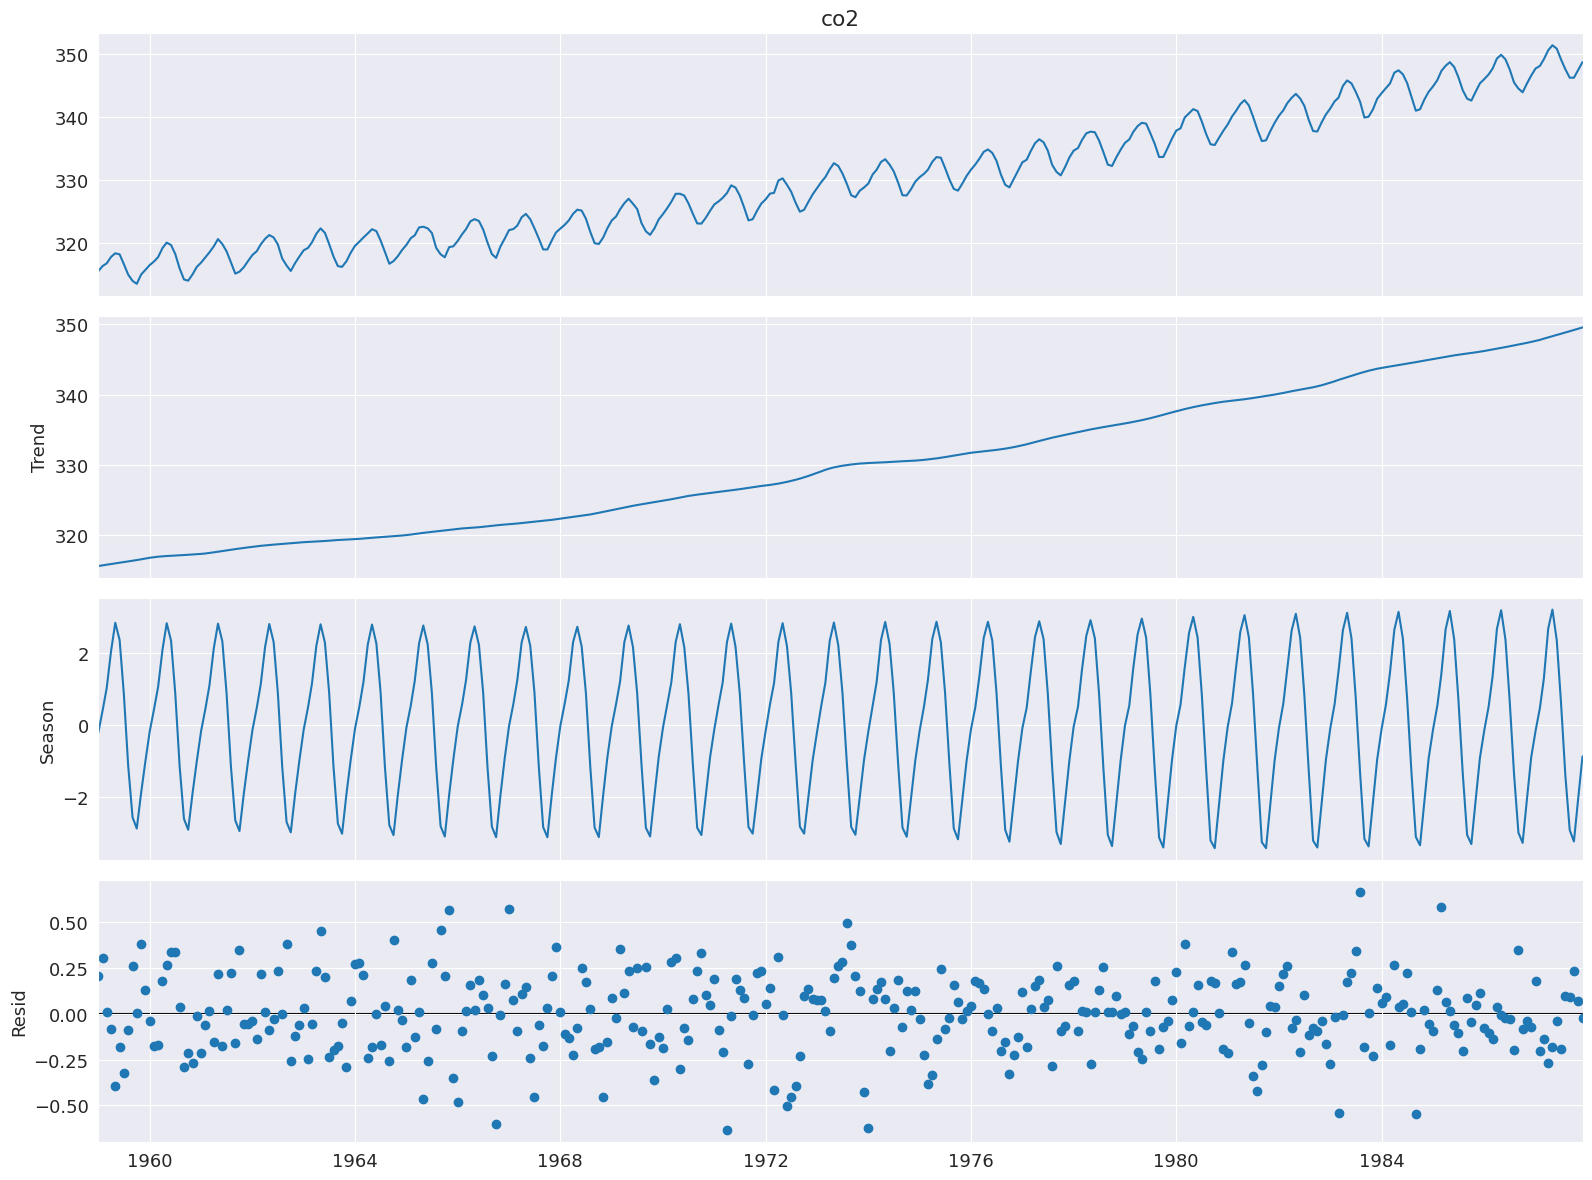

In [5]:
from statsmodels.tsa.seasonal import STL

stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()

### ADD OUTLIER
- adding 10% to original value of the 100th data-point

In [16]:
# add outlier
co2_bad = co2.copy()
co2_bad.iloc[100] = co2.iloc[100] * 1.1

## DECOMPOSITION WITH OUTLIER

- Significant biasness in trend and seasonality if decomposition done with outlier

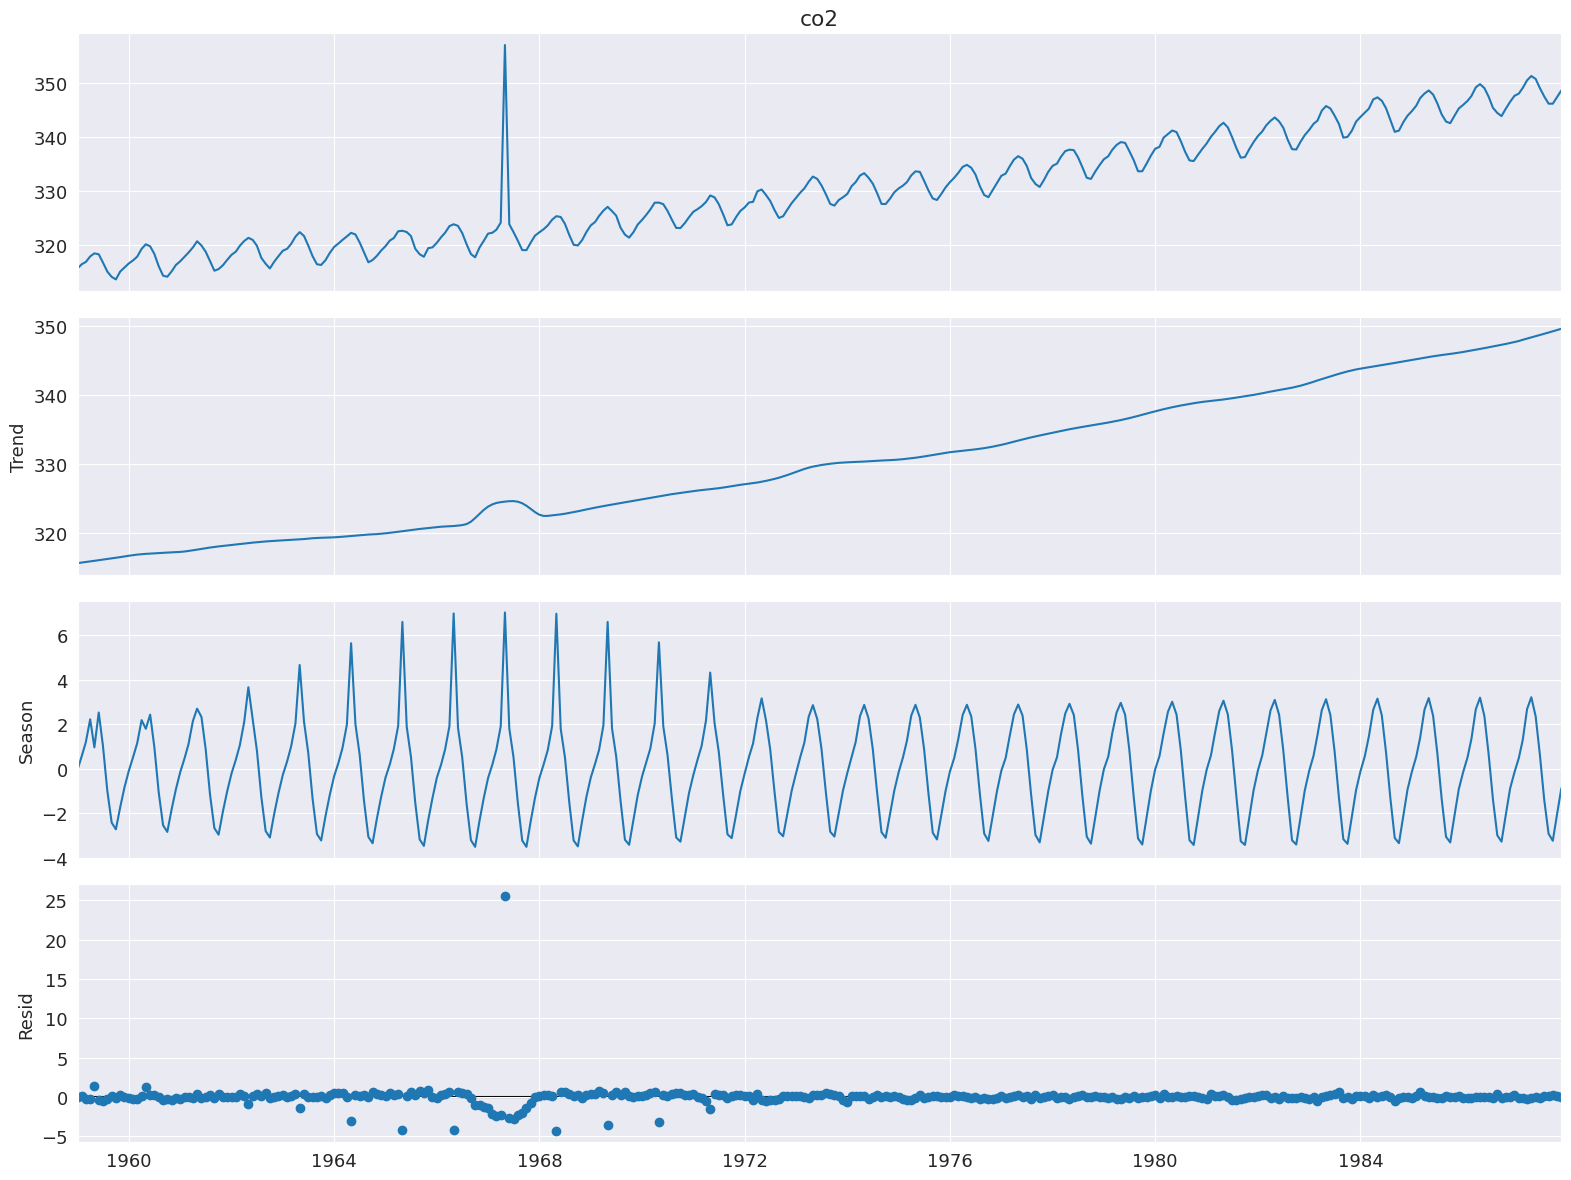

In [17]:
stl_bad = STL(co2_bad, seasonal=13)
res_bad = stl_bad.fit()
fig_bad = res_bad.plot()

## DECOMPOSITION WITH OUTLIER SMOOTHING
- Remove outlier and then use neighbourhood mean to impute.
- decompose.
- `+` nill or negligible effect on tend or seasonality.

In [18]:
co2_bad_removed = co2_bad.copy()
co2_bad_removed.iloc[100] = (co2_bad.iloc[99]+co2_bad.iloc[101])/2

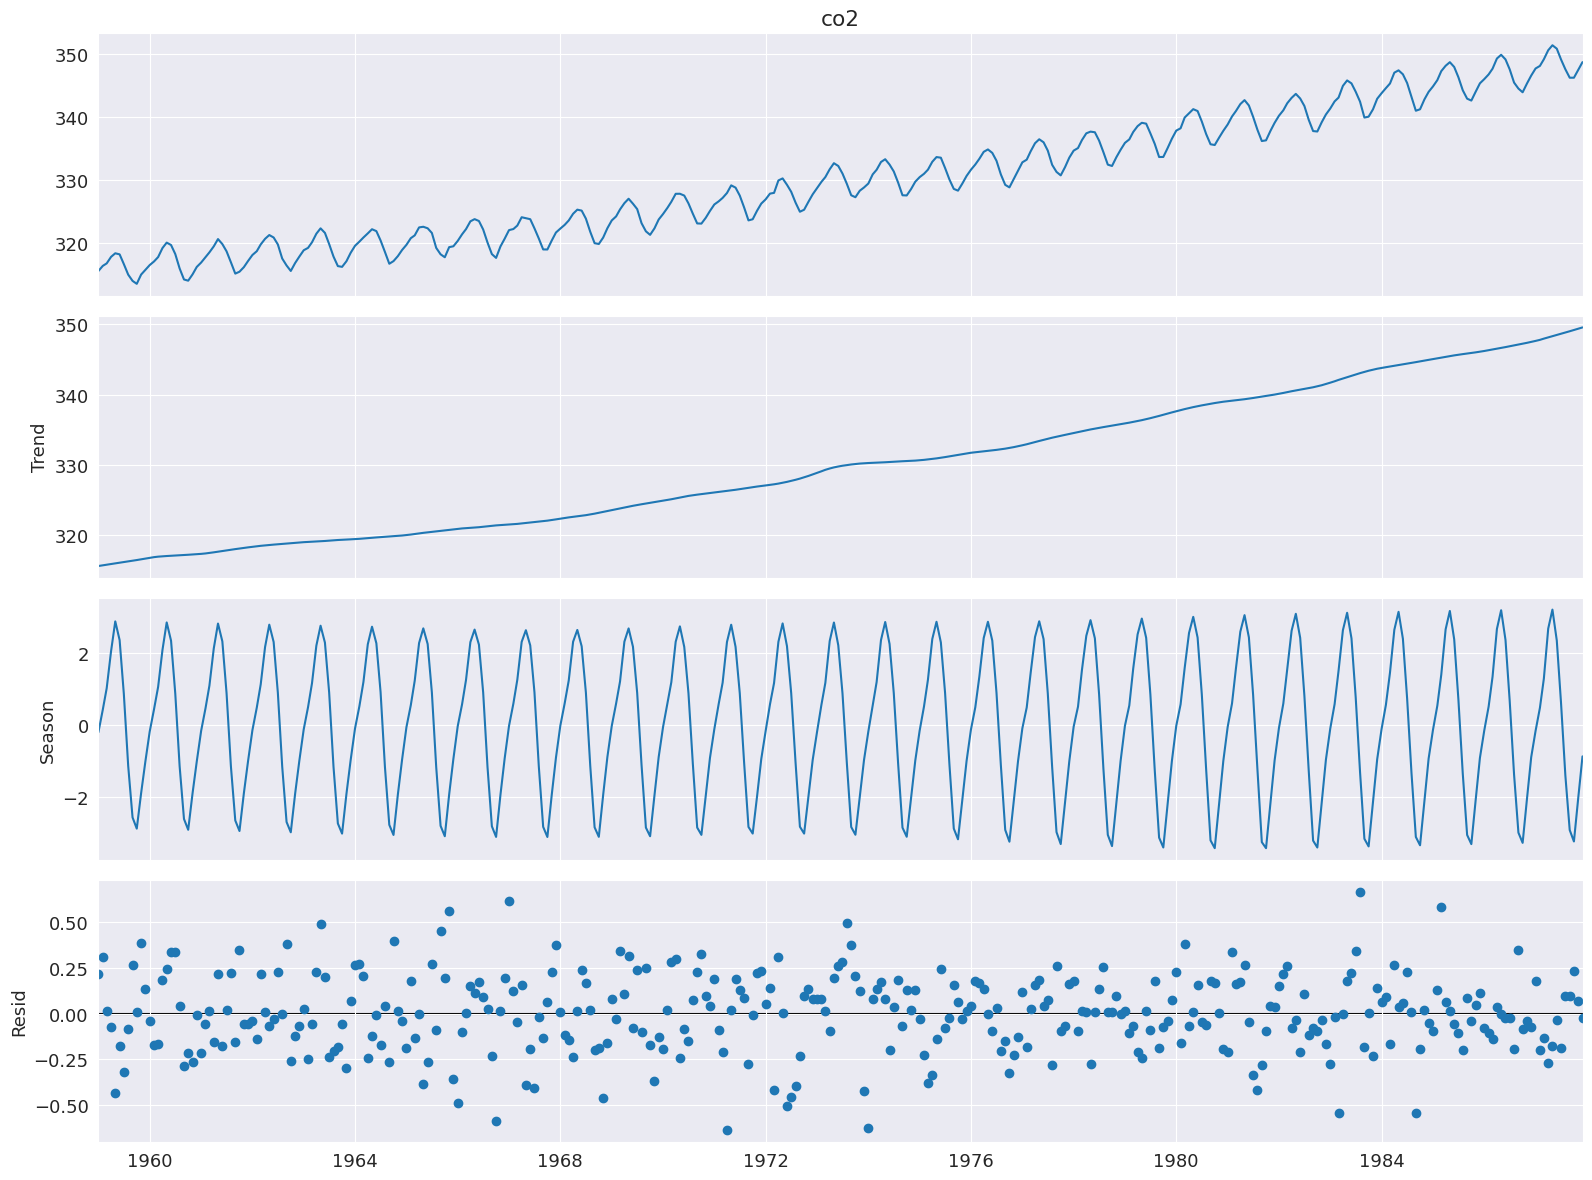

In [19]:
stl_bad_removed = STL(co2_bad_removed, seasonal=13)
res_bad_removed = stl_bad_removed.fit()
fig_bad_removed = res_bad_removed.plot()